In [1]:
# ============================================================
# Comparative Machine Learning Models on Iris Dataset
# ============================================================

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# 2. Load Iris Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("Data Shape:", X.shape)
print("Classes:", iris.target_names)
print(X.head())

Data Shape: (150, 4)
Classes: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# 3. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# 4. Standardize Features (Important for SVM & Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# 5. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True)
}


In [6]:
# 6. Train Models and Collect Accuracies
accuracies = {}
conf_matrices = {}

for name, model in models.items():
    if name == "Random Forest":
        # Random Forest works fine without scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc

    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = cm

    print(f"{name} Accuracy: {acc:.2f}")

Logistic Regression Accuracy: 0.93
Random Forest Accuracy: 0.90
SVM Accuracy: 0.97


/tmp/ipython-input-2665676478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='pastel')


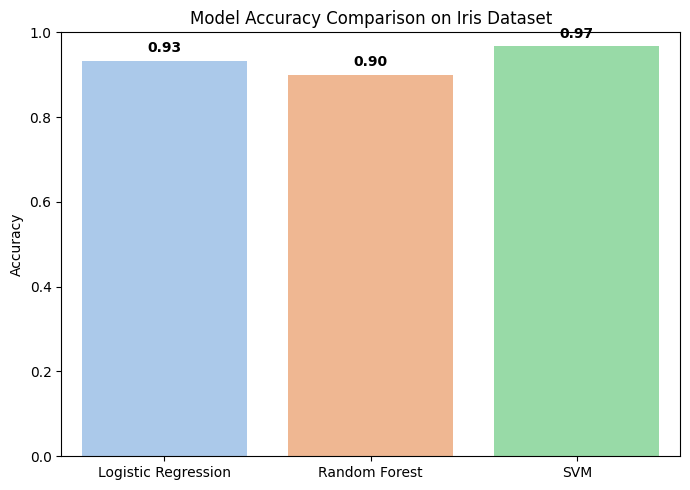

In [7]:
# 7. Plot Accuracy Comparison
plt.figure(figsize=(7,5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='pastel')
plt.title('Model Accuracy Comparison on Iris Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('accuracy_comparison.png', dpi=300)
plt.show()


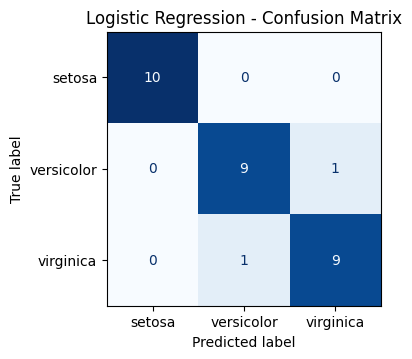

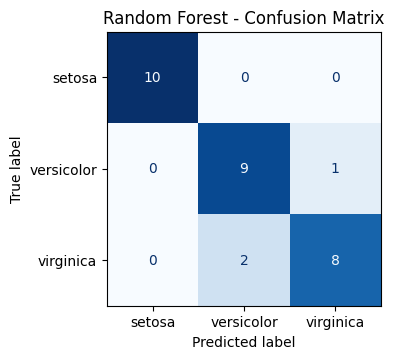

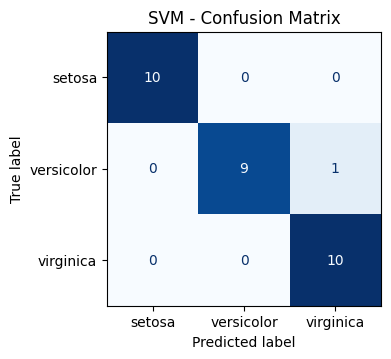

In [8]:
# 8. Display Confusion Matrices
for name, cm in conf_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    fig, ax = plt.subplots(figsize=(4,4))
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{name.replace(" ","_")}.png', dpi=300)
    plt.show()

In [9]:
# 9. Completion Message
print("✅ Comparative ML Models complete! Accuracies plotted and confusion matrices saved.")

✅ Comparative ML Models complete! Accuracies plotted and confusion matrices saved.
